# Statistical inference figures generation

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot helper functions
from ministats import plot_pdf
from ministats.utils import savefigure

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
# RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/prob/conclusion"
DESTDIR2 = "figures/stats/intro"

<Figure size 640x480 with 0 Axes>

### Weights population


In [4]:
from scipy.stats import norm
from scipy.stats import t as tdist
from ministats.probs import MixtureModel

# most men
muW = 80
sigmaW = 12
rvW1 = norm(loc=muW, scale=sigmaW)

# heavy men
rvW2 = tdist(df=4, loc=120, scale=10)

rvWpop = MixtureModel([rvW1, rvW2], weights=[0.98,0.02])

In [5]:
import numpy as np

N = 10000
np.random.seed(45)
population = rvWpop.rvs(N).round(1)

In [6]:
# population model
rvW = norm(loc=muW, scale=sigmaW)

Saved figure to figures/prob/conclusion/weights_pop_and_pop_model.pdf
Saved figure to figures/prob/conclusion/weights_pop_and_pop_model.png


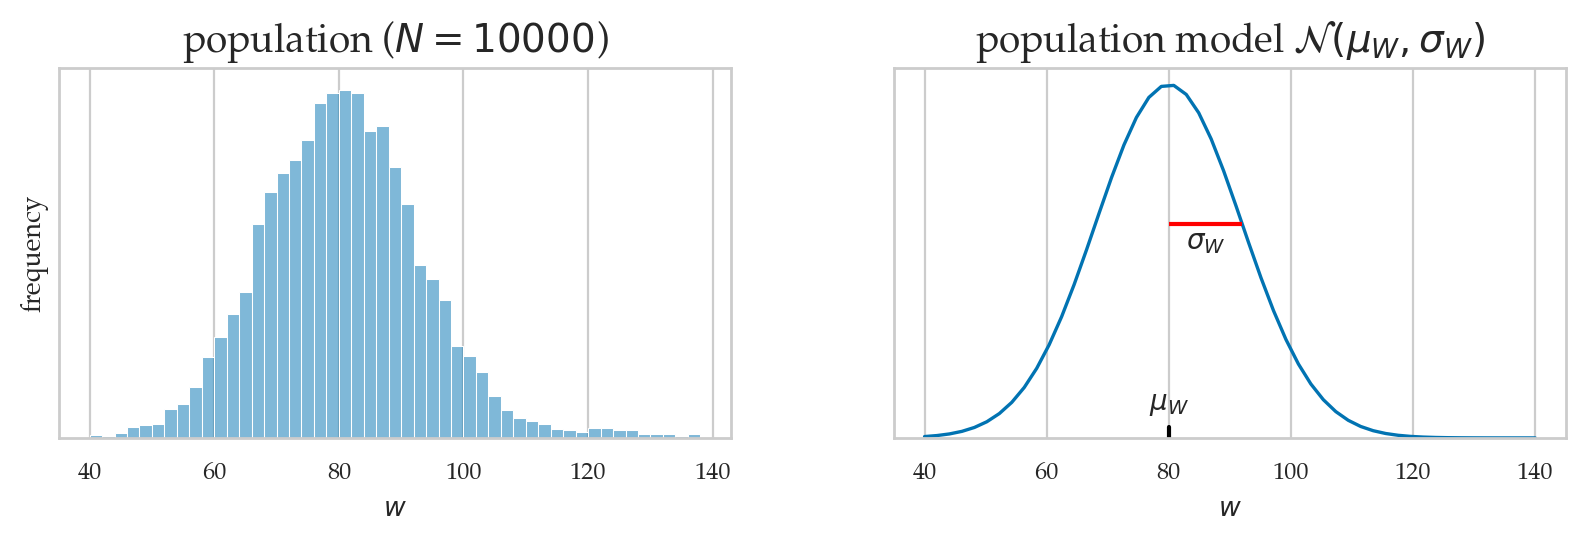

In [7]:
xlims = [40,140]


with plt.rc_context({"figure.figsize":(8,2.8)}):
    fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)    
    # population histogram
    sns.histplot(population, bins=range(*xlims,2), stat="density", alpha=0.5, ax=ax1)
    ax1.set_title(f"population ($N={N}$)", fontdict={"size":14})
    ax1.set_yticks([])
    ax1.set_xlabel("$w$")
    ax1.set_ylabel("frequency")
    # population model
    ws = np.linspace(*xlims)
    ax = sns.lineplot(x=ws, y=rvW.pdf(ws), ax=ax2)
    ax2.set_title("population model $\\mathcal{N}(\\mu_W,\\sigma_W)$", fontdict={"size":14})
    ax2.set_xlabel("$w$")
    ax2.set_ylabel("$f_{W}$")
    # Mean annotation - small tick mark near x-axis
    ax2.plot([muW, muW], [0, 0.001], color='black', lw=1.5)  # Short vertical tick
    ax2.text(muW, 0.002, r"$\mu_W$", ha="center", va="bottom", fontsize=10)
    # Sigma annotation - half horizontal line to the right at touching y-level
    sigma_y = rvW.pdf(muW + sigmaW)  # Find PDF height at one sigma right
    ax2.hlines(y=sigma_y, xmin=muW, xmax=muW + sigmaW, color='red', linestyle='-', lw=1.5)
    ax2.text(muW + 0.5*sigmaW, sigma_y-0.0005, r"$\sigma_W$", va="top", ha="center", fontsize=10)

    filename = os.path.join(DESTDIR, "weights_pop_and_pop_model.pdf")
    savefigure(fig, filename, tight_layout_kwargs={"w_pad":6})

Saved figure to figures/stats/intro/weights_pop_and_pop_model_part2.pdf
Saved figure to figures/stats/intro/weights_pop_and_pop_model_part2.png


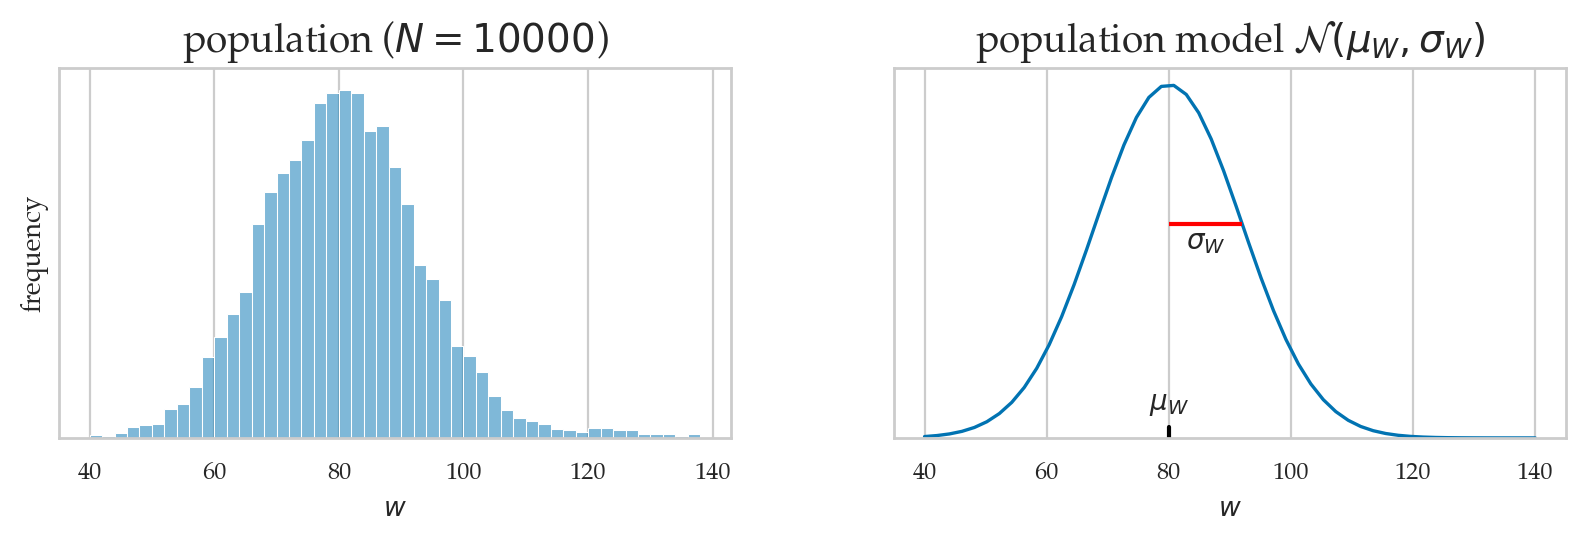

In [8]:
xlims = [40,140]


with plt.rc_context({"figure.figsize":(8,2.8)}):
    fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)    
    # population histogram
    sns.histplot(population, bins=range(*xlims,2), stat="density", alpha=0.5, ax=ax1)
    ax1.set_title(f"population ($N={N}$)", fontdict={"size":14})
    ax1.set_yticks([])
    ax1.set_xlabel("$w$")
    ax1.set_ylabel("frequency")
    # population model
    ws = np.linspace(*xlims)
    ax = sns.lineplot(x=ws, y=rvW.pdf(ws), ax=ax2)
    ax2.set_title("population model $\\mathcal{N}(\\mu_W,\\sigma_W)$", fontdict={"size":14})
    ax2.set_xlabel("$w$")
    ax2.set_ylabel("$f_{W}$")
    # Mean annotation - small tick mark near x-axis
    ax2.plot([muW, muW], [0, 0.001], color='black', lw=1.5)  # Short vertical tick
    ax2.text(muW, 0.002, r"$\mu_W$", ha="center", va="bottom", fontsize=10)
    # Sigma annotation - half horizontal line to the right at touching y-level
    sigma_y = rvW.pdf(muW + sigmaW)  # Find PDF height at one sigma right
    ax2.hlines(y=sigma_y, xmin=muW, xmax=muW + sigmaW, color='red', linestyle='-', lw=1.5)
    ax2.text(muW + 0.5*sigmaW, sigma_y-0.0005, r"$\sigma_W$", va="top", ha="center", fontsize=10)

    filename = os.path.join(DESTDIR2, "weights_pop_and_pop_model_part2.pdf")
    savefigure(fig, filename, tight_layout_kwargs={"w_pad":6})

## Weights sample

In [9]:
# np.random.seed(44)
# np.random.seed(47)
n = 30
np.random.seed(48)
sample = np.random.choice(population, size=n, replace=False)
sample

array([ 60.1,  78.9,  79. , 104.3,  80. ,  56.8,  52.8,  78.6,  72.8,
       104.6,  75.7,  90.8,  79.1,  64.6,  59.3,  76.5,  62.9,  73.8,
        71.5,  81.2,  86.8,  67.7,  93.8,  77.8, 112.7,  80.4,  89.5,
        69.5,  89.1,  72.5])

In [10]:
# sample stats
np.mean(sample), np.std(sample, ddof=1)

(np.float64(78.10333333333332), np.float64(14.188423725562044))

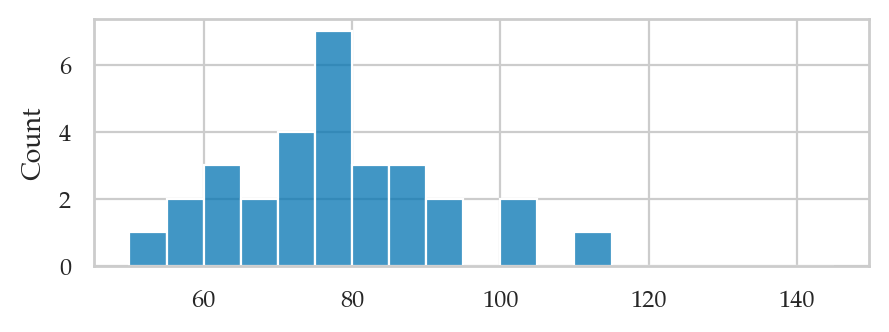

In [11]:
import seaborn as sns
sns.histplot(sample, bins=range(50,150,5));

### Statistical inference tasks (Conclusion of Part 1)

Saved figure to figures/prob/conclusion/histplots_weights_pop_and_sample.pdf
Saved figure to figures/prob/conclusion/histplots_weights_pop_and_sample.png


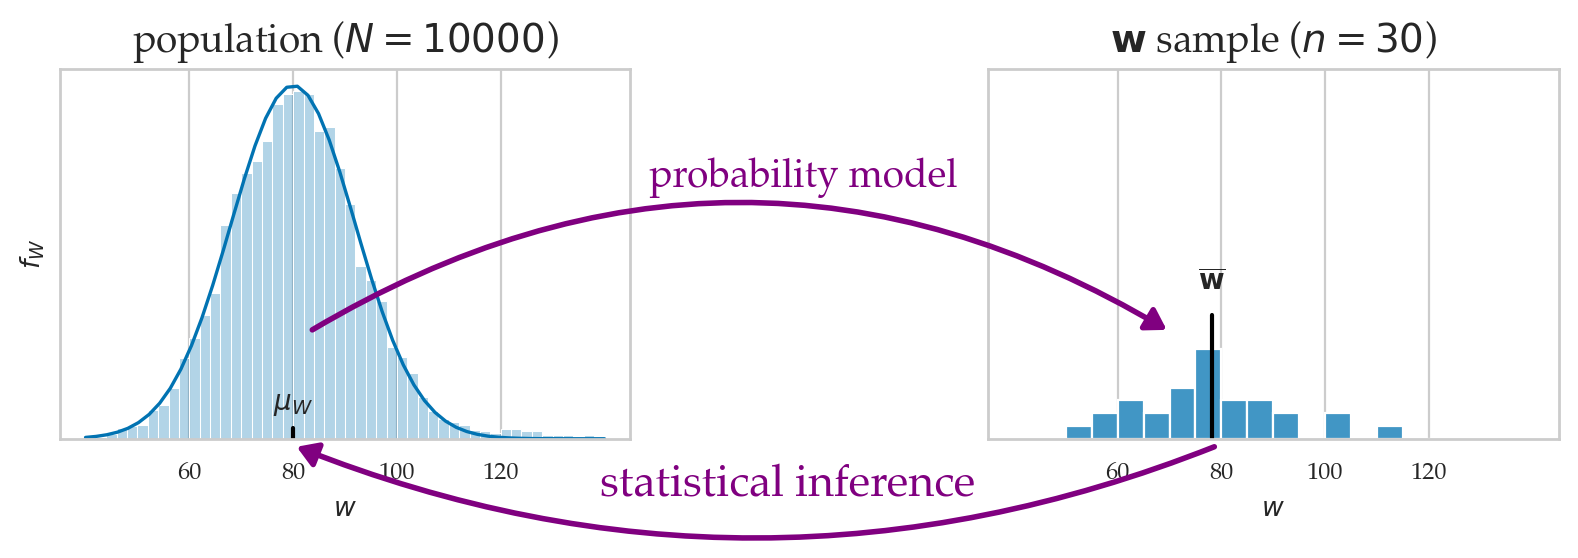

In [12]:
from matplotlib.patches import FancyArrowPatch


wbar = np.mean(sample)
wstd = np.std(sample, ddof=1)

with plt.rc_context({"figure.figsize":(8,2.8)}):
    fig, (ax1,ax2) = plt.subplots(1,2)

    # LEFT
    # population    
    sns.histplot(population, bins=np.arange(*xlims,2), ax=ax1, stat="density", alpha=0.3)
    ax1.set_title(f"population ($N={N}$)", fontdict={"size":14})
    # population model
    ws = np.linspace(*xlims)
    sns.lineplot(x=ws, y=rvW.pdf(ws), ax=ax1)
    ax1.set_xlabel("$w$")
    ax1.set_xticks([60,80,100,120])
    ax1.set_ylabel("$f_{W}$")
    ax1.set_yticks([])
    ax1.plot([muW, muW], [0, 0.001], color='black', lw=1.5)  # Short vertical tick
    ax1.text(muW, 0.002, r"$\mu_W$", ha="center", va="bottom", fontsize=10)

    # RIGHT sample
    sns.histplot(sample, bins=range(xlims[0],xlims[1]+1,5), ax=ax2)
    ax2.set_ylim([0,29])
    ax2.set_ylabel(None)
    ax2.set_xlabel("$w$")
    ax2.set_yticks([])
    ax2.set_xticks([60,80,100,120])
    ax2.set_title(r"$\mathbf{w}$ sample ($n=" + str(n) + "$)", fontdict={"size":14})
    # Sample mean tick + label
    y_mid = 8
    ax2.plot([wbar, wbar], [0, y_mid+1.7], color="black", lw=1.5)  # Short vertical tick
    ax2.text(wbar, y_mid+3, r"$\overline{\mathbf{w}}$", ha="center", va="bottom", fontsize=10)
    # # Sample standard deviation - vertical dashed lines at mean ± std, extending halfway up y-axis
    # ax2.axvline(wbar - wstd, color="gray", linestyle="--", lw=1, ymax=0.5)
    # ax2.axvline(wbar + wstd, color="gray", linestyle="--", lw=1, ymax=0.5)
    # # Centered labels for std lines
    # ax2.text(wbar - wstd, y_mid, r"$\overline{\mathbf{w}} - s_{\mathbf{w}}$", 
    #          ha="center", va="bottom", fontsize=9)
    # ax2.text(wbar + wstd, y_mid, r"$\overline{\mathbf{w}} + s_{\mathbf{w}}$", 
    #          ha="center", va="bottom", fontsize=9)

    # Adjusted Arrow Placement for Increased w_pad
    arrow_color = "purple"

    # Get the midpoint between the two axes in figure coordinates
    fig_width = fig.get_size_inches()[0]
    arrow_x_mid = 0.5 + (10 / fig_width)  # Adjust based on w_pad=10

    # Data generating process arrow (Population → Sample, curved upper)
    arrow_y_upper = 0.39  # Adjusted for better positioning
    arrow1 = FancyArrowPatch(posA=(0.2, arrow_y_upper), posB=(0.74, arrow_y_upper), 
                             arrowstyle="-|>,head_width=0.25,head_length=0.4", 
                             mutation_scale=15, color=arrow_color, linewidth=2,
                             connectionstyle="arc3,rad=-0.3",
                             transform=fig.transFigure)
    fig.add_artist(arrow1)
    ax1.text(0.51, 0.65, "probability model", 
             color=arrow_color, fontsize=14, ha="center", transform=fig.transFigure)

    # Statistical inference arrow (Sample → Population, curved lower)
    arrow_y_lower = 0.19
    arrow2 = FancyArrowPatch(posA=(0.77, arrow_y_lower), posB=(0.19, arrow_y_lower), 
                             arrowstyle="-|>,head_width=0.25,head_length=0.4", 
                             mutation_scale=15, color=arrow_color, linewidth=2, connectionstyle="arc3,rad=-0.2",
                             transform=fig.transFigure)

    fig.add_artist(arrow2)
    ax1.text(0.5, 0.1, "statistical inference", 
             color=arrow_color, fontsize=16, ha="center", transform=fig.transFigure)

    filename = os.path.join(DESTDIR, "histplots_weights_pop_and_sample.pdf")
    savefigure(fig, filename, tight_layout_kwargs={"w_pad":5})

### Statistical inference tasks (Part 2)

Saved figure to figures/stats/intro/histplots_weights_pop_and_sample_part2.pdf
Saved figure to figures/stats/intro/histplots_weights_pop_and_sample_part2.png


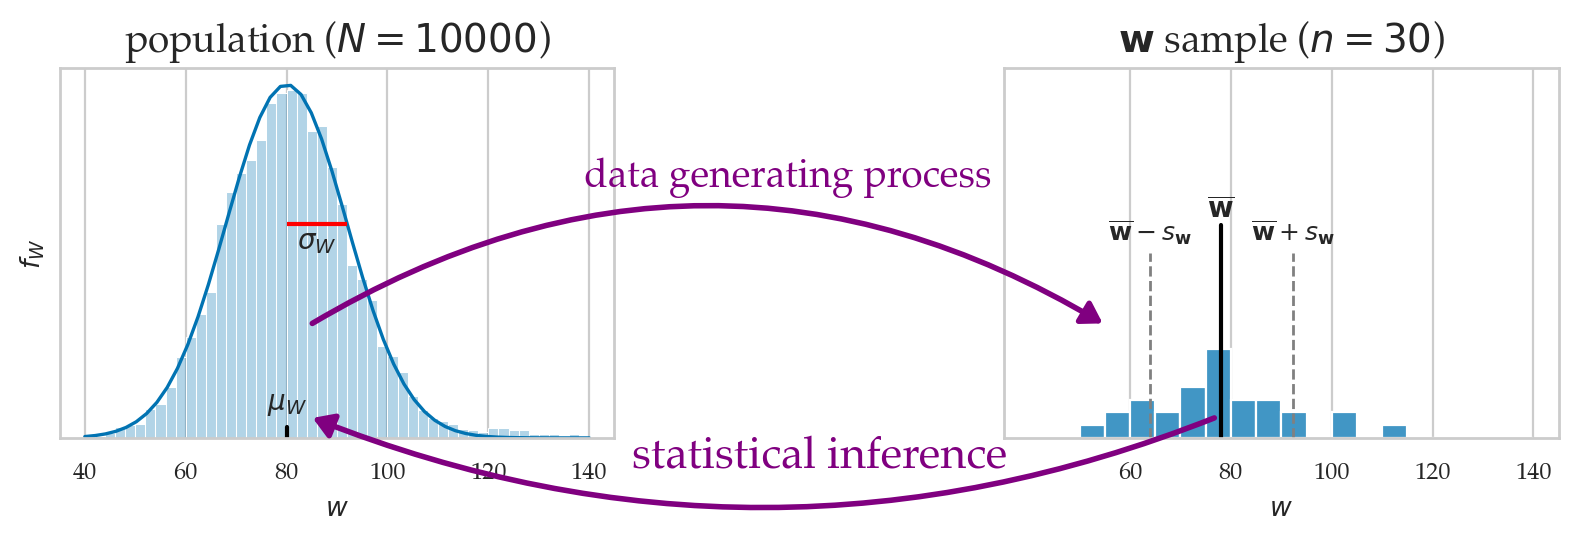

In [13]:
from matplotlib.patches import FancyArrowPatch


wbar = np.mean(sample)
wstd = np.std(sample, ddof=1)

with plt.rc_context({"figure.figsize":(8,2.8)}):
    fig, (ax1,ax2) = plt.subplots(1,2)

    # LEFT
    # population    
    sns.histplot(population, bins=np.arange(*xlims,2), ax=ax1, stat="density", alpha=0.3)
    ax1.set_title(f"population ($N={N}$)", fontdict={"size":14})
    # population model
    ws = np.linspace(*xlims)
    sns.lineplot(x=ws, y=rvW.pdf(ws), ax=ax1)
    ax1.set_xlabel("$w$")
    ax1.set_ylabel("$f_{W}$")
    ax1.set_yticks([])
    ax1.plot([muW, muW], [0, 0.001], color='black', lw=1.5)  # Short vertical tick
    ax1.text(muW, 0.002, r"$\mu_W$", ha="center", va="bottom", fontsize=10)
    # Sigma annotation - half horizontal line to the right at touching y-level
    sigma_y = rvW.pdf(muW + sigmaW)  # Find PDF height at one sigma right
    ax1.hlines(y=sigma_y, xmin=muW, xmax=muW + sigmaW, color='red', linestyle='-', lw=1.5)
    ax1.text(muW + 0.5*sigmaW, sigma_y-0.0005, r"$\sigma_W$", va="top", ha="center", fontsize=10)

    # RIGHT sample
    sns.histplot(sample, bins=range(xlims[0],xlims[1]+1,5), ax=ax2)
    ax2.set_ylim([0,29])
    ax2.set_ylabel(None)
    ax2.set_xlabel("$w$")
    ax2.set_yticks([])
    ax2.set_xticks([60,80,100,120,140])
    ax2.set_title(r"$\mathbf{w}$ sample ($n=" + str(n) + "$)", fontdict={"size":14})
    # Sample mean tick + label
    y_mid = 30 / 2
    ax2.plot([wbar, wbar], [0, y_mid+1.7], color="black", lw=1.5)  # Short vertical tick
    ax2.text(wbar, y_mid+1.7, r"$\overline{\mathbf{w}}$", ha="center", va="bottom", fontsize=10)
    # Sample standard deviation - vertical dashed lines at mean ± std, extending halfway up y-axis
    ax2.axvline(wbar - wstd, color="gray", linestyle="--", lw=1, ymax=0.5)
    ax2.axvline(wbar + wstd, color="gray", linestyle="--", lw=1, ymax=0.5)
    # Centered labels for std lines
    ax2.text(wbar - wstd, y_mid, r"$\overline{\mathbf{w}} - s_{\mathbf{w}}$", 
             ha="center", va="bottom", fontsize=9)
    ax2.text(wbar + wstd, y_mid, r"$\overline{\mathbf{w}} + s_{\mathbf{w}}$", 
             ha="center", va="bottom", fontsize=9)

    # Adjusted Arrow Placement for Increased w_pad
    arrow_color = "purple"

    # Get the midpoint between the two axes in figure coordinates
    fig_width = fig.get_size_inches()[0]
    arrow_x_mid = 0.5 + (10 / fig_width)  # Adjust based on w_pad=10

    # Data generating process arrow (Population → Sample, curved upper)
    arrow_y_upper = 0.4  # Adjusted for better positioning
    arrow1 = FancyArrowPatch(posA=(0.2, arrow_y_upper), posB=(0.70, arrow_y_upper), 
                             arrowstyle="-|>,head_width=0.25,head_length=0.4", 
                             mutation_scale=15, color=arrow_color, linewidth=2,
                             connectionstyle="arc3,rad=-0.3",
                             transform=fig.transFigure)
    fig.add_artist(arrow1)
    ax1.text(0.50, 0.65, "data generating process", 
             color=arrow_color, fontsize=14, ha="center", transform=fig.transFigure)



    # Statistical inference arrow (Sample → Population, curved lower)
    arrow_y_lower = 0.24
    arrow2 = FancyArrowPatch(posA=(0.77, arrow_y_lower), posB=(0.2, arrow_y_lower), 
                             arrowstyle="-|>,head_width=0.25,head_length=0.4", 
                             mutation_scale=15, color=arrow_color, linewidth=2, connectionstyle="arc3,rad=-0.2",
                             transform=fig.transFigure)

    fig.add_artist(arrow2)
    ax1.text(0.52, 0.15, "statistical inference", 
             color=arrow_color, fontsize=16, ha="center", transform=fig.transFigure)

    filename = os.path.join(DESTDIR2, "histplots_weights_pop_and_sample_part2.pdf")
    savefigure(fig, filename, tight_layout_kwargs={"w_pad":5})


### Statistical inference

The goal of most statistical analysis is inferential statistics, which is the process of making inferences about a population based on a sample from that population. We usually assume the population is described by some probability distribution, which is a mathematical description for the type of individuals in the population.

For example, the population of IQ scores in the is know to follow the normal distribution with mean $\mu$ (read miu) and standard deviation $\sigma$ (sigma), which we denote as $\mathcal{N}(\mu,\sigma)$. By convention, we denote the parameters of the population using Greek letters. You can think of the parameters $\mu$ and $\sigma$ as control knobs on the distribution that determine its shape.

It is usually prohibitively expensive to measure the IQ score of every individual in the population, so instead we obtain a random sample of individuals and measure their IQ scores. The goal of statistical inference is to learn information about the population based on a sample, as illustrated by the backward arrow in Figure 1. Specifically, we want to find the population parameters $\mu$  and $\sigma$.

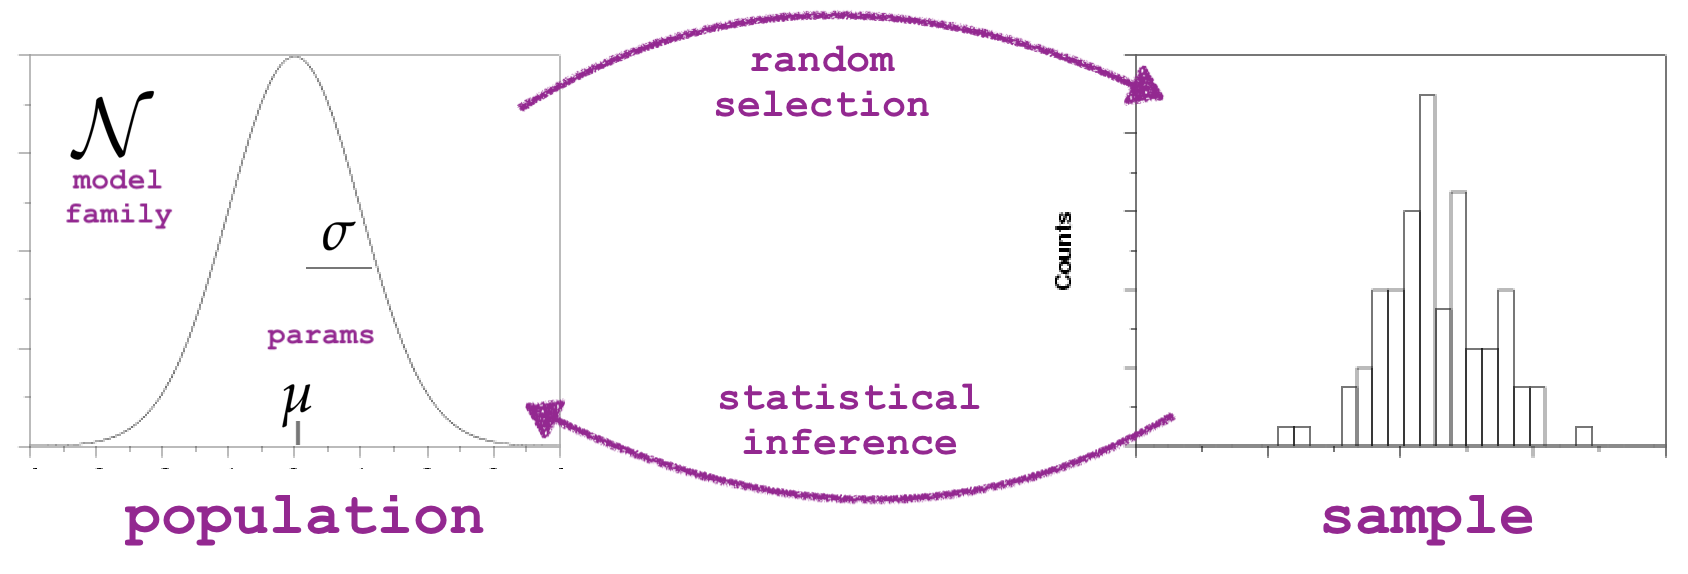
**Figure 1**. Illustration of the random selection mechanism which generates the data sample
and the statistical inference process, which tries to guess the population parameters.

